# Import module

The link to get [ImageAnalysis3](https://github.com/zhengpuas47/ImageAnalysis3) 

Or from the Zhuang lab archived [source_tools](https://github.com/ZhuangLab/Chromatin_Analysis_2020_cell/tree/master/sequential_tracing/source)

## ImageAnalysis3 and basic modules

In [1]:
%run "C:\Users\shiwei\Documents\ImageAnalysis3\required_files\Startup_py3.py"
sys.path.append(r"C:\Users\shiwei\Documents")

import ImageAnalysis3 as ia
from ImageAnalysis3 import *
from ImageAnalysis3.classes import _allowed_kwds

import h5py
import ast
import pandas as pd

print(os.getpid())

51704


## Chromatin_analysis_tools etc

See **functions** in the repository for [AnalysisTool_Chromatin](../../README.md)

In [2]:
# Chromatin_analysis_tools (ATC)
# Get path for the py containing functions
import os
import sys
import importlib
module_path =r'C:\Users\shiwei\Documents\AnalysisTool_Chromatin'
if module_path not in sys.path:
    sys.path.append(module_path)
    
# import relevant modules
import gene_selection 
importlib.reload(gene_selection)
import gene_to_loci
importlib.reload(gene_to_loci)
import gene_activity
importlib.reload(gene_activity)
import loci_1d_features
importlib.reload(loci_1d_features)  

import atac_to_loci
importlib.reload(atac_to_loci)

<module 'atac_to_loci' from 'C:\\Users\\shiwei\\Documents\\AnalysisTool_Chromatin\\atac_to_loci.py'>

# Define folders

In [3]:
# main folder for postanalysis
postanalysis_folder = r'L:\Shiwei\postanalysis_2024\v0'
# input files for postanalysis
input_folder = os.path.join(postanalysis_folder, 'resources_from_preprocess')

# output file to be generated
output_main_folder = os.path.join(postanalysis_folder, 'chromosome_scaling')

output_analysis_folder = os.path.join(output_main_folder, 'analysis')
output_figure_folder = os.path.join(output_main_folder, 'figures')

# make new folder if needed
make_output_folder = True

if make_output_folder and not os.path.exists(output_analysis_folder):
    os.makedirs(output_analysis_folder)
    print(f'Generating analysis folder: {output_analysis_folder}.')
elif os.path.exists(output_analysis_folder):
    print(f'Use existing analysis folder: {output_analysis_folder}.')
    
if make_output_folder and not os.path.exists(output_figure_folder):
    os.makedirs(output_figure_folder)
    print(f'Generating figure folder: {output_figure_folder}.')
elif os.path.exists(output_figure_folder):
    print(f'Use existing figure folder: {output_figure_folder}.')

Use existing analysis folder: L:\Shiwei\postanalysis_2024\v0\chromosome_scaling\analysis.
Use existing figure folder: L:\Shiwei\postanalysis_2024\v0\chromosome_scaling\figures.


# Plotting parameters

In [4]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('font', serif='Arial')

from ImageAnalysis3.figure_tools import _double_col_width, _single_col_width, _font_size, _ticklabel_size,_ticklabel_width

import seaborn as sns
sns.set_context("paper", rc={"font.size":_font_size,"axes.titlesize":_font_size+1,"axes.labelsize":_font_size})  

In [6]:
# Other required plotting parameters
_dpi = 300
_font_size = 7
_page_width = 5.5


## cell type color-codess

In [7]:
# cell labels from RNA-MERFISH and celltype prediction
selected_cell_labels = ['L2/3 IT','L4/5 IT','L5 IT','L6 IT','L5 ET','L5/6 NP','L6 CT','L6b',
                           'Sst','Pvalb','Lamp5','Sncg','Vip',
                           'Astro','Oligo','OPC','Micro','Endo','VLMC','SMC','Peri', 
                           #'other',
                          ]
# cell palette from RNA-MERFISH UMAP and stats
celltype_palette = {'Astro':'lightcoral', 
                    'Endo':'skyblue', 
                    'L2/3 IT':'gold', 
                    'L4/5 IT':'darkorange', 
                    'L5 ET':'mediumseagreen', 
                    'L5 IT':'aqua',
                    'L5/6 NP':'darkgreen',
                    'L6 CT':'brown',
                    'L6 IT':'magenta',
                    'L6b':'blue', 
                    'Lamp5':'orange', 
                    'Micro':'peachpuff',
                    'OPC':'thistle', 
                    'Oligo':'darkviolet',
                    'Peri':'sandybrown',
                    'Pvalb':'springgreen',
                    'SMC':'rosybrown',
                    'Sncg':'darkkhaki',
                    'Sst':'steelblue', 
                    'VLMC':'saddlebrown', 
                    'Vip':'red',
                    'other':'slategray'}


In [8]:
# this is the plotting order noted based on the snRNA transcriptional acitivty if needed
sorted_cellplot_order_byRNA = ['Micro', 'Oligo', 'Endo', 'OPC', 'Astro', 'Vip', 'Lamp5',
                  'L5/6 NP', 'Sst', 'Sncg', 'Pvalb', 'L4/5 IT', 'L6 CT',
                  'L6 IT', 'L6b', 'L2/3 IT', 'L5 IT', 'L5 ET']

# Load data relevant information

## load and format codebook

[merged codebook](../resources/merged_codebook.csv) as in the repository (merged for all DNA-MERFISH libraries)

In [11]:
# Load codebook 
codebook_fname = os.path.join(input_folder,'merged_codebook.csv')
codebook_df = pd.read_csv (codebook_fname, index_col=0)

# sort df by chr and chr_order
codebook_df = loci_1d_features.sort_loci_df_by_chr_order (codebook_df)
codebook_df.head()

,name,id,NDB_784,NDB_755,NDB_826,NDB_713,NDB_865,NDB_725,NDB_817,NDB_710,...,NDB_479,NDB_562,NDB_608,NDB_460,NDB_563,NDB_592,NDB_368,NDB_436,NDB_629,NDB_604
0,1:3742742-3759944,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1:6245958-6258969,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1:8740008-8759916,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1016,1:9627926-9637875,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017,1:9799472-9811359,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [12]:
# Format the chr loci name by 
# 1. changing loci name format
# 2. extract relevant information such as id, chr, chr_order, and library etc
from gene_to_loci import loci_pos_format
loci_name_list = list(map(loci_pos_format, codebook_df['name'].tolist()))
loci_name_arr = np.array(loci_name_list)

# convert to a new dataframe and set loci name as index
codebook_df = codebook_df[['name','id','chr','chr_order','library']]
codebook_df['loci_name'] = list(loci_name_arr[:,0])
codebook_df = codebook_df.set_index ('loci_name')

codebook_df.head()

,name,id,chr,chr_order,library
loci_name,,,,,
chr1_3742742_3759944,1:3742742-3759944,1,1,0.0,CTP11
chr1_6245958_6258969,1:6245958-6258969,2,1,1.0,CTP11
chr1_8740008_8759916,1:8740008-8759916,3,1,2.0,CTP11
chr1_9627926_9637875,1:9627926-9637875,1,1,3.0,CTP13
chr1_9799472_9811359,1:9799472-9811359,2,1,4.0,CTP13


# Load spatial distance from matrices

In [14]:
# Load class_2_median
# class to median distance dict
class_2_median_filename = os.path.join(input_folder, 'subclass_2_medianDict.pkl')

class_2_medianDict = pickle.load(open(class_2_median_filename, 'rb'))
print(class_2_medianDict.keys())

dict_keys(['Oligo', 'L5 IT', 'Micro', 'Peri', 'Endo', 'Astro', 'OPC', 'L6 CT', 'L5 ET', 'L5/6 NP', 'Pvalb', 'L6 IT', 'Lamp5', 'L6b', 'Sst', 'SMC', 'L4/5 IT', 'L2/3 IT', 'Vip', 'Sncg', 'VLMC'])


# Plot scaling of chromosomes

In [15]:
from scipy.spatial.distance import squareform, pdist

## plotting color palette

In [16]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by mixing it with white.
    Amount specifies the degree of lightening: 0 is the original color, 1 is white.
    
    Args:
    - color: The color to lighten. Can be specified as a hex string or a named color.
    - amount: The amount to lighten by. Range is 0 to 1, where 0 is no change and 1 is white.
    
    Returns:
    - The lightened color in hex format.
    """
    import matplotlib.colors as mc
    import colorsys
    
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])


lighter_celltype_color_dict = {celltype: lighten_color(color, amount=0.35) for celltype, color in celltype_palette.items()}

## chromosome 1 (old style)

## all chromosomes (excluding ChrX and ChrY)

In [17]:
# excluding ChrX and ChrY
sort_chroms = [str(_ch) for _ch in range(1,20)]

### plot selected cell types

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

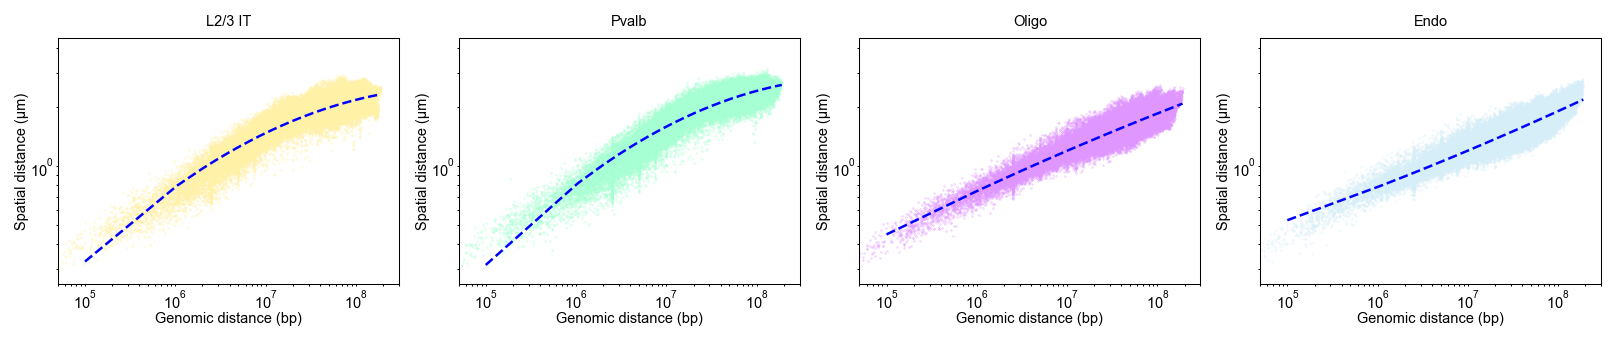

In [18]:
sel_class_list = ['L2/3 IT', 'Pvalb','Oligo', 'Endo']

fig, ax =plt.subplots(1, len(sel_class_list), figsize = (2.7*len(sel_class_list),2.3), dpi=150)

for _idx, _celltype in enumerate(sel_class_list):
    
    gdist_entries_all = []
    median_entries_all = []
    
    for sel_chr in sort_chroms:
        _chr_codebook = codebook_df.loc[codebook_df['chr']==sel_chr]
        _region_centers = np.sort([np.mean(np.array(_n.split(sel_chr+':')[1].split('-'), dtype=np.int32)) 
                                   for _n in _chr_codebook['name']])


        median_mat = class_2_medianDict[_celltype][f'cis_{sel_chr}']

        gdist_mat = squareform(pdist(_region_centers[:,np.newaxis]))


        gdist_entries = gdist_mat[np.triu_indices(len(gdist_mat),1)]
        median_entries = median_mat[np.triu_indices(len(median_mat),1)]
        valid_inds = np.isfinite(np.log(gdist_entries)) & np.isfinite(np.log(median_entries))
        gdist_entries = gdist_entries[valid_inds]
        median_entries = median_entries[valid_inds]
        
        gdist_entries_all.extend(gdist_entries)
        median_entries_all.extend(median_entries)

    gdist_entries_all = np.array(gdist_entries_all)
    median_entries_all = np.array(median_entries_all)

    median_lr = scipy.stats.linregress(np.log(gdist_entries_all), np.log(median_entries_all))
    #print(median_lr)
    # 2nd polynomial to capture bending but not overfitting each cell type
    median_poly = np.polyfit(np.log(gdist_entries_all), np.log(median_entries_all) ,deg=2)

    ax[_idx].scatter(gdist_entries_all, median_entries_all,s=0.1, alpha=0.5, c=lighter_celltype_color_dict[_celltype],
                  rasterized=True,   
              )

    gdist_plot = np.linspace(1e5, gdist_entries_all.max(), 200)


    y_plot = np.exp(np.polyval(median_poly, np.log(gdist_plot)))
    ax[_idx].plot(gdist_plot, y_plot, c='blue', linestyle='--',#label='Expected'
           )


    ax[_idx].set_xlabel('Genomic distance (bp)', fontsize = 7, labelpad=0.5)
    ax[_idx].set_ylabel('Spatial distance (\u00B5m)', fontsize = 7, labelpad=0.5)
    ax[_idx].set_title(f'{_celltype}', fontsize = 7)


    #plt.legend(loc='lower center', bbox_to_anchor=(0.5, -1.3))  # Move the legend to the center bottom
    ax[_idx].set_xscale('log')
    ax[_idx].set_yscale('log')

    ax[_idx].set_xlim([0.5e5,3e8])
    ax[_idx].set_ylim([0.25,4.5])
    [i[1].set_linewidth(0.5) for i in ax[_idx].spines.items()]
    ax[_idx].tick_params(axis='both', which='both', labelsize = 7,
                         length=1, width=0.5, pad=1, 
                         direction='out', bottom=True, left=True
                        #labelleft=True, labelbottom=True,labelright=False, labeltop=False,
                           )

    
plt.tight_layout()
plt.subplots_adjust(hspace=1)
plt.savefig(os.path.join(output_figure_folder,f'scaling_wholeChr_AllChr_large_sel_celltypes.pdf'),
            transparent=True, bbox_inches='tight', pad_inches=0.2, dpi=300)
plt.show()

### plot other cell types

In [20]:
# cell types that have good number of cells
celltype_list_from_heatmap = ['Peri', 'Micro', 'Endo', 'Oligo','Astro',  'OPC', 
                              'Pvalb', 'Sst', 'Vip',
                              'L4/5 IT', 'L6 CT', 'L2/3 IT', 'L6b', 'L6 IT', 'L5 IT', 'L5 ET', ]
np.array(celltype_list_from_heatmap)

array(['Peri', 'Micro', 'Endo', 'Oligo', 'Astro', 'OPC', 'Pvalb', 'Sst',
       'Vip', 'L4/5 IT', 'L6 CT', 'L2/3 IT', 'L6b', 'L6 IT', 'L5 IT',
       'L5 ET'], dtype='<U7')

In [21]:
# remove cells that have been plotted above
other_class_list = [c for c in celltype_list_from_heatmap if c not in sel_class_list]
len(other_class_list)

12

In [22]:
# use darker color for plotting these other cell types
lighter_celltype_color_dict = {celltype: lighten_color(color, amount=0.75) for celltype, color in celltype_palette.items()}

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

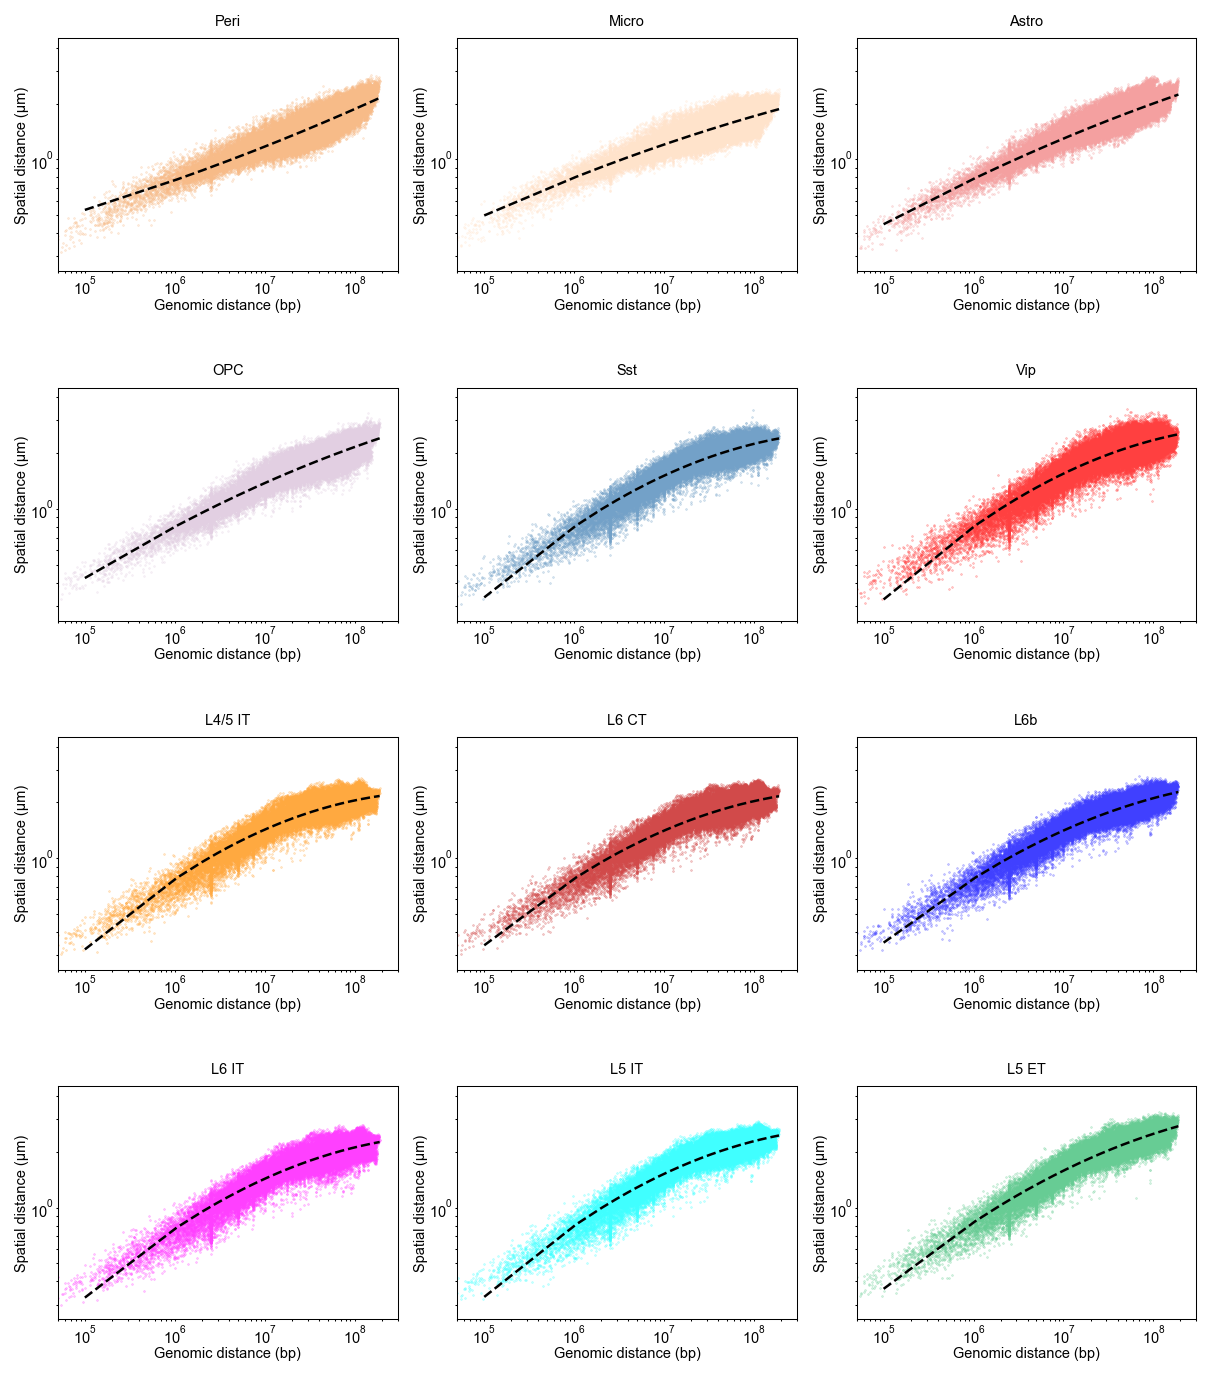

In [23]:
# plot
fig, axes =plt.subplots(4,3, figsize = (2.7*3, 2.3*4), dpi=150)

ax = axes.flatten()

for _idx, _celltype in enumerate(other_class_list):
    
    gdist_entries_all = []
    median_entries_all = []
    
    for sel_chr in sort_chroms:
        _chr_codebook = codebook_df.loc[codebook_df['chr']==sel_chr]
        _region_centers = np.sort([np.mean(np.array(_n.split(sel_chr+':')[1].split('-'), dtype=np.int32)) 
                                   for _n in _chr_codebook['name']])


        median_mat = class_2_medianDict[_celltype][f'cis_{sel_chr}']

        gdist_mat = squareform(pdist(_region_centers[:,np.newaxis]))


        gdist_entries = gdist_mat[np.triu_indices(len(gdist_mat),1)]
        median_entries = median_mat[np.triu_indices(len(median_mat),1)]
        valid_inds = np.isfinite(np.log(gdist_entries)) & np.isfinite(np.log(median_entries))
        gdist_entries = gdist_entries[valid_inds]
        median_entries = median_entries[valid_inds]
        
        gdist_entries_all.extend(gdist_entries)
        median_entries_all.extend(median_entries)

    gdist_entries_all = np.array(gdist_entries_all)
    median_entries_all = np.array(median_entries_all)

    median_lr = scipy.stats.linregress(np.log(gdist_entries_all), np.log(median_entries_all))
    #print(median_lr)
    # 2nd polynomial to capture bending but not overfitting each cell type
    median_poly = np.polyfit(np.log(gdist_entries_all), np.log(median_entries_all) ,deg=2)

    ax[_idx].scatter(gdist_entries_all, median_entries_all,s=0.1, alpha=0.5, 
                     c=lighter_celltype_color_dict[_celltype],
                     #c= celltype_palette[_celltype],
                  rasterized=True,   #label='Observed'
              )

    gdist_plot = np.linspace(1e5, gdist_entries_all.max(), 200)

    y_plot = np.exp(np.polyval(median_poly, np.log(gdist_plot)))
    ax[_idx].plot(gdist_plot, y_plot, c='black', linestyle='--',#label='Expected'
           )


    ax[_idx].set_xlabel('Genomic distance (bp)', fontsize = 7, labelpad=0.5)
    ax[_idx].set_ylabel('Spatial distance (\u00B5m)', fontsize = 7, labelpad=0.5)
    ax[_idx].set_title(f'{_celltype}', fontsize = 7)


    #plt.legend(loc='lower center', bbox_to_anchor=(0.5, -1.3))  # Move the legend to the center bottom
    ax[_idx].set_xscale('log')
    ax[_idx].set_yscale('log')

    ax[_idx].set_xlim([0.5e5,3e8])
    ax[_idx].set_ylim([0.25,4.5])
    [i[1].set_linewidth(0.5) for i in ax[_idx].spines.items()]
    ax[_idx].tick_params(axis='both', which='both', labelsize = 7,
                         length=1, width=0.5, pad=1, 
                         direction='out', bottom=True, left=True
                        #labelleft=True, labelbottom=True,labelright=False, labeltop=False,
                           )

    
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.savefig(os.path.join(output_figure_folder,f'scaling_wholeChr_AllChr_large_other_celltypes.pdf'),
            transparent=True, bbox_inches='tight', pad_inches=0.2, dpi=300)
plt.show()